# WeatherPy API Analysis -- HW6
----
Yamini Sasidhar, T/Th Class (RUTSOM201807DATA5)

In [1]:
# Dependencies and Setup
from time import gmtime, strftime
import matplotlib.pyplot as plt
import openweathermapy as owm
import pandas as pd
import numpy as np
import requests
import json
import os

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = os.path.join('output','cities.csv')

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)

# Print the city count to confirm sufficient count
len(cities)

637

In [3]:
# start off using a temporary list with fewer cities
# search more likely successful if including country code
smaller_list = [cities[i] + ',' + countries[i] for i, city in enumerate(cities[0:8])]
print(smaller_list)

['cayenne,gf', 'cherskiy,ru', 'punta arenas,cl', 'cockburn harbour,tc', 'vardo,no', 'bredasdorp,za', 'uray,ru', 'atuona,pf']


In [4]:
# here's the full list with country codes
full_list = [cities[i] + ',' + countries[i] for i, city in enumerate(cities)]

### Perform API Calls

In [14]:
# prelim code for set increments, just brainstorming order
counter = 1
x = 1
for i in range(0,100):
#     print(f'record {counter} for set {x}')    
    counter = counter + 1
    if counter > 50:
        x = x + 1
        counter = 1

In [6]:
print('Beginning Data Retrieval')
print('-----------------------------')

base_url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'units=imperial'
weather_check = []
counter = 1
x = 1

for city in full_list:
    url = base_url + units + '&appid=' + api_key + '&q=' + city
    try:
        response = requests.get(url).json()
        # temp = response['main']['temp']        # original from weather check
        
        # capture all weather data in variables
        city = response['name']
        cloudiness = response['clouds']['all']
        country = response['sys']['country']
        date = int(response['dt'])               # unix timestamp
        humidity = response['main']['humidity']
        lat = response['coord']['lat']
        lng = response['coord']['lon']
        max_temp = response['main']['temp_max']
        wind_speed = response['wind']['speed']
        
        # append weather data variables to dictionary
        weather_check.append({'city':city,
                              'cloudiness':cloudiness,
                              'country':country,
                              'date':date,
                              'humidity':humidity,
                              'lat':lat,
                              'lng':lng,
                              'max_temp':max_temp,
                              'wind_speed':wind_speed})
        
        # confirm record is found with process statement
        print(f"Processing record {counter} of Set {x} | {city}")
            
    except:
        # confirm record is missing with skip statement
        print('City not found. Skipping...')
        
    # increment counter for incrementing sets
    counter = counter + 1
    if counter > 50:
        x = x + 1
        counter = 1

print('-----------------------------')
print('Data Retrieval Complete')

Beginning Data Retrieval
-----------------------------
Processing record 1 of Set 1 | Cayenne
Processing record 2 of Set 1 | Cherskiy
Processing record 3 of Set 1 | Punta Arenas
City not found. Skipping...
Processing record 5 of Set 1 | Vardo
Processing record 6 of Set 1 | Bredasdorp
Processing record 7 of Set 1 | Uray
Processing record 8 of Set 1 | Atuona
Processing record 9 of Set 1 | Noshiro
Processing record 10 of Set 1 | Georgetown
Processing record 11 of Set 1 | Beringovskiy
Processing record 12 of Set 1 | Nikolskoye
Processing record 13 of Set 1 | Machilipatnam
Processing record 14 of Set 1 | Westport
Processing record 15 of Set 1 | Marystown
Processing record 16 of Set 1 | Port Alfred
Processing record 17 of Set 1 | Suphan Buri
Processing record 18 of Set 1 | Grindavik
Processing record 19 of Set 1 | Kargil
Processing record 20 of Set 1 | Kodiak
Processing record 21 of Set 1 | Busselton
Processing record 22 of Set 1 | Severo-Kurilsk
Processing record 23 of Set 1 | Ketchikan
Pro

Processing record 7 of Set 5 | Samarai
Processing record 8 of Set 5 | Kalmunai
Processing record 9 of Set 5 | Lagos
Processing record 10 of Set 5 | Ust-Koksa
Processing record 11 of Set 5 | Pailon
Processing record 12 of Set 5 | Lorengau
Processing record 13 of Set 5 | Verkhoyansk
Processing record 14 of Set 5 | Saldanha
Processing record 15 of Set 5 | Grand Island
Processing record 16 of Set 5 | Sarasota
City not found. Skipping...
City not found. Skipping...
Processing record 19 of Set 5 | Mayor Pablo Lagerenza
Processing record 20 of Set 5 | Lhokseumawe
Processing record 21 of Set 5 | San Patricio
City not found. Skipping...
Processing record 23 of Set 5 | Zyryanka
Processing record 24 of Set 5 | Ambon
Processing record 25 of Set 5 | Ciudad Bolivar
Processing record 26 of Set 5 | Fairbanks
Processing record 27 of Set 5 | Igrim
Processing record 28 of Set 5 | Sioux Lookout
Processing record 29 of Set 5 | Carballo
Processing record 30 of Set 5 | Teguldet
Processing record 31 of Set 5 

Processing record 16 of Set 9 | Beisfjord
City not found. Skipping...
City not found. Skipping...
Processing record 19 of Set 9 | Kaseda
Processing record 20 of Set 9 | Aldan
Processing record 21 of Set 9 | Bagn
Processing record 22 of Set 9 | Saint-Pierre
Processing record 23 of Set 9 | Tefe
Processing record 24 of Set 9 | Cairns
Processing record 25 of Set 9 | Sauda
Processing record 26 of Set 9 | Maningrida
Processing record 27 of Set 9 | Aklavik
Processing record 28 of Set 9 | Oneonta
Processing record 29 of Set 9 | La Ronge
Processing record 30 of Set 9 | Katsuura
Processing record 31 of Set 9 | Coos Bay
Processing record 32 of Set 9 | Totoral
Processing record 33 of Set 9 | Tiarei
Processing record 34 of Set 9 | Sovetskiy
Processing record 35 of Set 9 | Margate
Processing record 36 of Set 9 | Lazaro Cardenas
Processing record 37 of Set 9 | Rocky Mountain House
City not found. Skipping...
Processing record 39 of Set 9 | Gniezno
Processing record 40 of Set 9 | Matagami
Processing r

Processing record 21 of Set 13 | Dharchula
Processing record 22 of Set 13 | Foz
City not found. Skipping...
City not found. Skipping...
Processing record 25 of Set 13 | Cherdyn
City not found. Skipping...
Processing record 27 of Set 13 | Kango
Processing record 28 of Set 13 | Baiyin
Processing record 29 of Set 13 | Fort-Shevchenko
City not found. Skipping...
Processing record 31 of Set 13 | Bowen
Processing record 32 of Set 13 | Magadan
Processing record 33 of Set 13 | Mongo
Processing record 34 of Set 13 | Havre
Processing record 35 of Set 13 | Fort Nelson
Processing record 36 of Set 13 | Redding
Processing record 37 of Set 13 | Andenes
-----------------------------
Data Retrieval Complete


In [7]:
# display weather data dictionary
# print(json.dumps(weather_check,indent=4,sort_keys=True))

### Convert Raw Data to DataFrame

In [8]:
# load into dataframe
df = pd.DataFrame(weather_check)

# write csv without index, prepends comma otherwise
df.to_csv(output_data_file,index=False)

# display dataframe
df.head()

,city,cloudiness,country,date,humidity,lat,lng,max_temp,wind_speed
0,Cayenne,75,GF,1538152200,59,4.94,-52.33,91.40,12.75
1,Cherskiy,44,RU,1538154135,95,68.75,161.30,26.84,2.68
2,Punta Arenas,0,CL,1538150400,100,-53.16,-70.91,48.20,11.41
3,Vardo,75,NO,1538149800,86,70.37,31.11,33.80,8.05
4,Bredasdorp,8,ZA,1538150400,55,-34.53,20.04,60.80,20.80


### Plotting the Data

In [9]:
# grab current date of analysis for plot titles
date = strftime('%m/%d/%y', gmtime())

#### Latitude vs. Temperature Plot

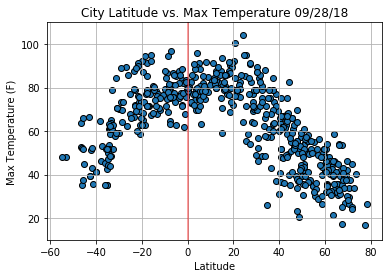

In [10]:
df.plot.scatter('lat','max_temp',s=36,edgecolors='black',figsize=(6,4))
plt.title(f'City Latitude vs. Max Temperature {date}')
plt.vlines(0,-50,150,alpha=0.5,color='r')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.ylim(10,110)
plt.grid()

plt.savefig(os.path.join('output','lat_vs_temp.png'))

#### Latitude vs. Humidity Plot

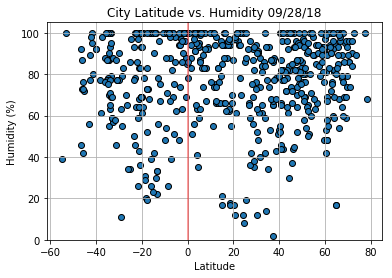

In [11]:
df.plot.scatter('lat','humidity',s=36,edgecolors='black',figsize=(6,4))
plt.title(f'City Latitude vs. Humidity {date}')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()
plt.vlines(0,-50,150,alpha=0.5,color='r')
plt.ylim(0,105)

plt.savefig(os.path.join('output','lat_vs_humid.png'))

#### Latitude vs. Cloudiness Plot

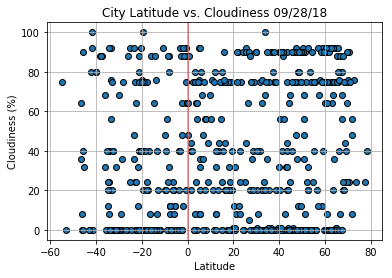

In [12]:
df.plot.scatter('lat','cloudiness',s=36,edgecolors='black',figsize=(6,4))
plt.title(f'City Latitude vs. Cloudiness {date}')
plt.vlines(0,-50,150,alpha=0.5,color='r')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.ylim(-5,105)
plt.grid()

plt.savefig(os.path.join('output','lat_vs_cloud.png'))

#### Latitude vs. Wind Speed Plot

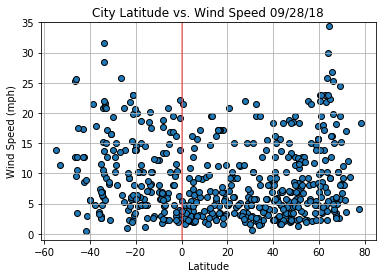

In [13]:
df.plot.scatter('lat','wind_speed',s=36,edgecolors='black',figsize=(6,4))
plt.title(f'City Latitude vs. Wind Speed {date}')
plt.vlines(0,-50,150,alpha=0.5,color='r')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.ylim(-1,35)
plt.grid()

plt.savefig(os.path.join('output','lat_vs_wind.png'))